In [81]:
import pandas as pd
data =pd.read_csv("/home/leong/Desktop/Shopping Trends/shopping_trends_updated.csv")
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [82]:
data.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

EDA

In [83]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


Insights from the data in form of user stories

1) As a marketing manager, I want to analyze the purchase behavior of our customers to identify trends and preferences. This will help me develop targeted marketing campaigns, optimize product offerings, and increase customer engagement.

In [84]:
#Perform exploratory data analysis
purchase_patterns = data.groupby('Customer ID')['Item Purchased'].count()
average_purchase_frequency = purchase_patterns.mean()
print("Average Purchase Frequency:", average_purchase_frequency)


Average Purchase Frequency: 1.0


2) As a sales representative, I want to understand the demographics of our customer base and their purchasing patterns. This will enable me to tailor my sales approach, identify potential upselling or cross-selling opportunities, and improve customer satisfaction.

Age Distribution:
69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: Age, dtype: int64
Gender Distribution:
Male      2652
Female    1248
Name: Gender, dtype: int64


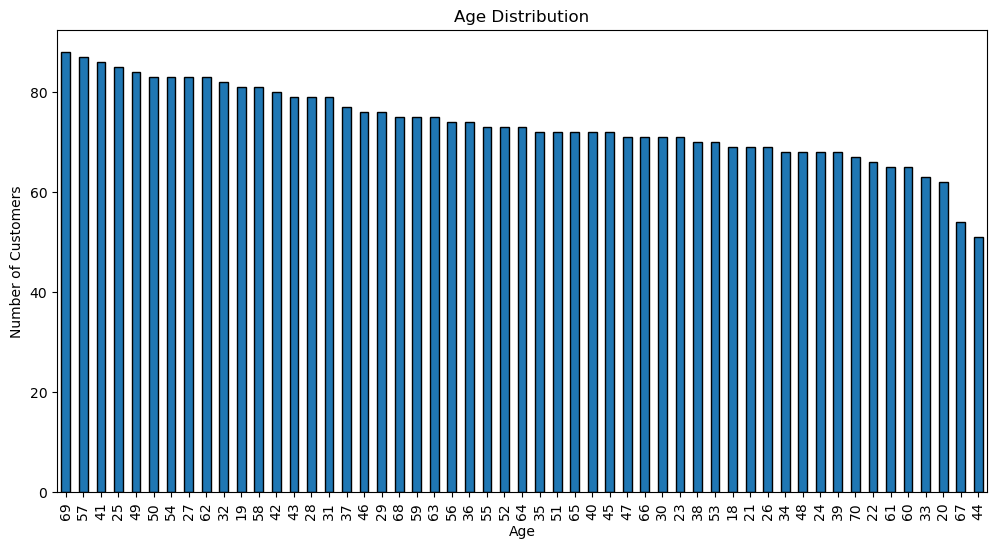

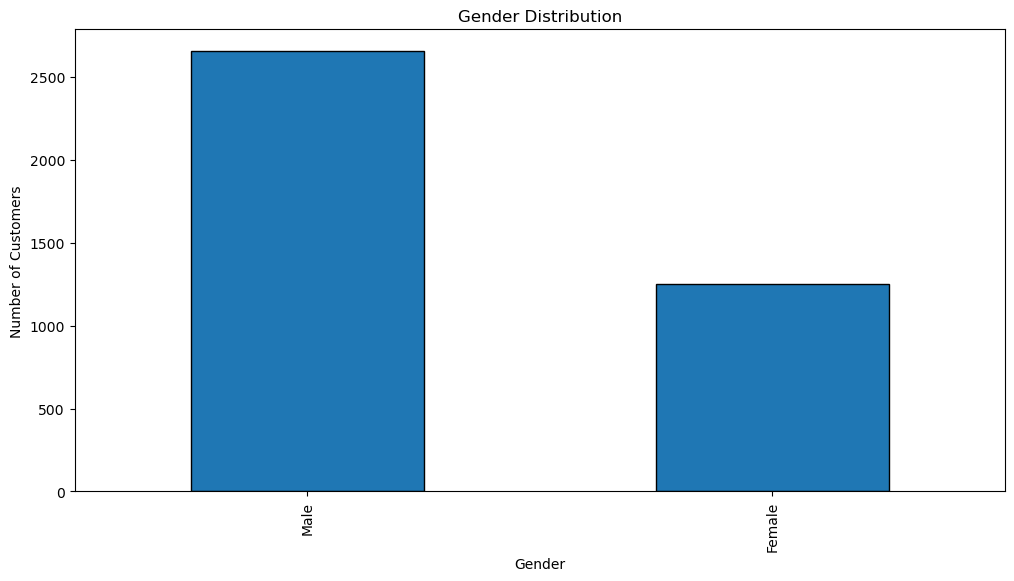

In [85]:
#customer demographics
customer_demographics = data[['Customer ID', 'Age', 'Gender']].drop_duplicates()
age_distribution = customer_demographics['Age'].value_counts()
gender_distribution = customer_demographics['Gender'].value_counts()
print("Age Distribution:")
print(age_distribution)
print("Gender Distribution:")
print(gender_distribution)

import matplotlib.pyplot as plt
#age distribution
plt.figure(figsize=(12, 6))
age_distribution.plot(kind='bar', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Age Distribution')
plt.show()

#gender distribution
plt.figure(figsize=(12, 6))
gender_distribution.plot(kind='bar', edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Gender Distribution')
plt.show()


3) As a customer support representative, I want to access customer satisfaction data and review ratings to proactively address any issues or concerns. This will help me provide better assistance, improve customer retention, and maintain high levels of customer satisfaction.

Average Review Rating: 3.7499487179487176


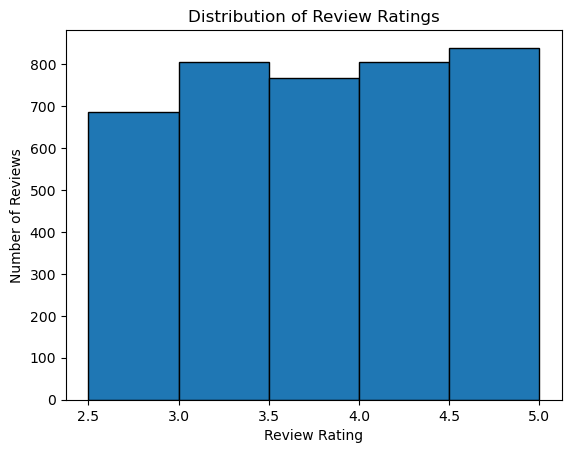

In [86]:
average_review_rating = data['Review Rating'].mean()
print("Average Review Rating:", average_review_rating)

#review ratings
plt.hist(data['Review Rating'], bins=5, edgecolor='black')
plt.xlabel('Review Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Review Ratings')
plt.show()

4) As a business owner, I want to analyze the effectiveness of our marketing promotions and discounts to determine which strategies generate the highest return on investment. This will allow me to allocate resources effectively and refine our marketing campaigns for better results.

Conversion Rates:
Promo Code Used
No     0.57
Yes    0.43
Name: Customer ID, dtype: float64


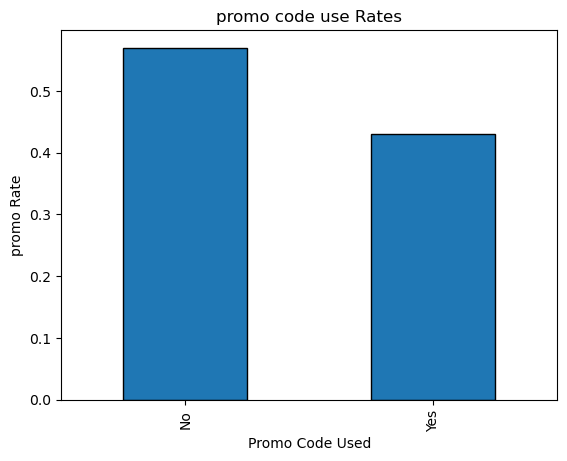

In [87]:
promo_rate = data.groupby('Promo Code Used')['Customer ID'].nunique() / data['Customer ID'].nunique()
print("Conversion Rates:")
print(promo_rate)

#conversion rates
promo_rate.plot(kind='bar', edgecolor='black')
plt.xlabel('Promo Code Used')
plt.ylabel('promo Rate')
plt.title('promo code use Rates')
plt.show()


5) As a product manager, I want to analyze the popularity of different products and categories to inform product development decisions. This will help me identify areas of growth, prioritize new product launches, and refine existing offerings based on customer preferences.

Popular Products:
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Item Purchased, dtype: int64


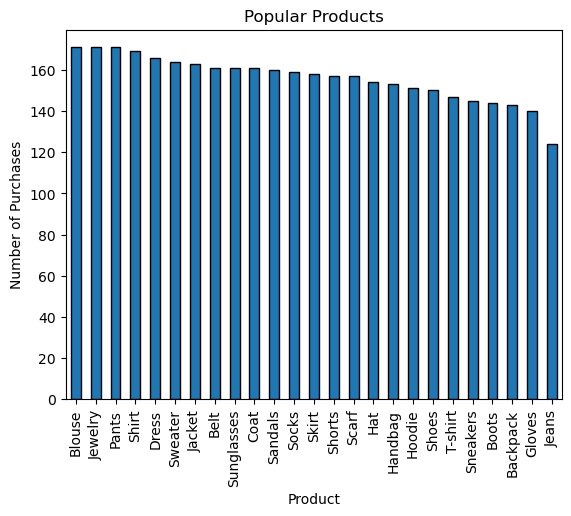

In [88]:
popular_products = data['Item Purchased'].value_counts()
popular_categories = data['Category'].value_counts()

print("Popular Products:")
print(popular_products)


#popular products
popular_products.plot(kind='bar', edgecolor='black')
plt.xlabel('Product')
plt.ylabel('Number of Purchases')
plt.title('Popular Products')
plt.show()

Popular Categories:
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64


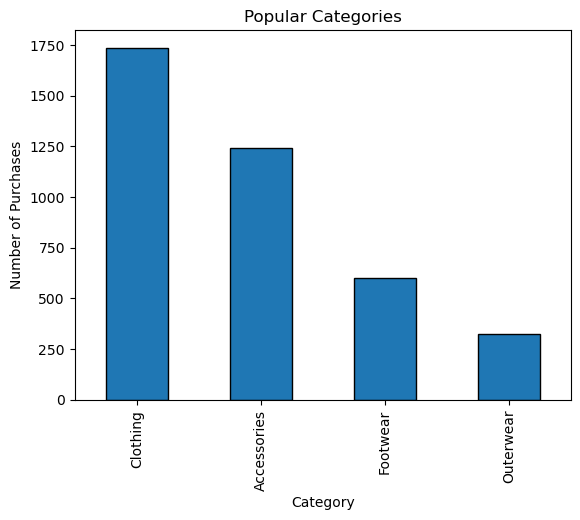

In [89]:
print("Popular Categories:")
print(popular_categories)

#popular categories
popular_categories.plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Number of Purchases')
plt.title('Popular Categories')
plt.show()


6) As a finance manager, I want to analyze payment methods and purchase amounts to optimize our payment processing systems and identify any potential issues related to payment processing. This will help streamline financial operations and ensure a smooth customer experience.

Payment Methods:
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: Payment Method, dtype: int64
.......................
Average Purchase Amounts:
Payment Method
Bank Transfer    59.712418
Cash             59.704478
Credit Card      60.074516
Debit Card       60.915094
PayPal           59.245199
Venmo            58.949527
Name: Purchase Amount (USD), dtype: float64


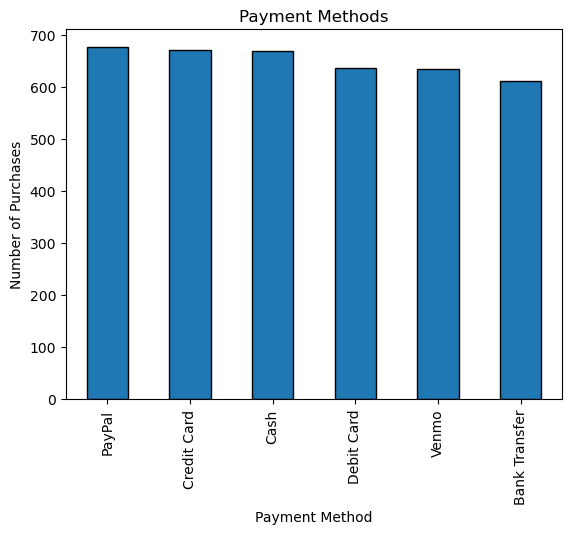

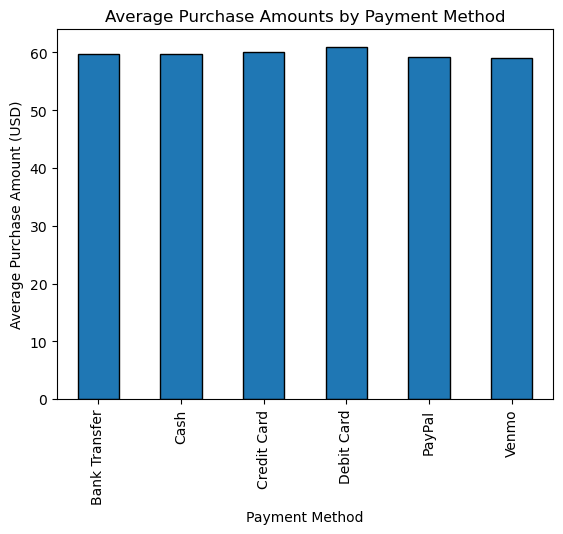

In [90]:
payment_methods = data['Payment Method'].value_counts()
average_purchase_amounts = data.groupby('Payment Method')['Purchase Amount (USD)'].mean()

print("Payment Methods:")
print(payment_methods)

print(".......................")
print("Average Purchase Amounts:")
print(average_purchase_amounts)

#payment methods
payment_methods.plot(kind='bar', edgecolor='black')
plt.xlabel('Payment Method')
plt.ylabel('Number of Purchases')
plt.title('Payment Methods')
plt.show()

#average purchase amounts
average_purchase_amounts.plot(kind='bar', edgecolor='black')
plt.xlabel('Payment Method')
plt.ylabel('Average Purchase Amount (USD)')
plt.title('Average Purchase Amounts by Payment Method')
plt.show()

7) As a business analyst, I want to identify customer segments based on demographics, purchase behavior, and subscription status. This will help me segment our customer base for targeted marketing, personalize promotions, and improve customer loyalty and retention.

Customer Segments:
Age  Subscription Status
18   No                     55
     Yes                    14
19   No                     58
     Yes                    23
20   No                     44
                            ..
68   Yes                    15
69   No                     67
     Yes                    21
70   No                     46
     Yes                    21
Name: Customer ID, Length: 106, dtype: int64


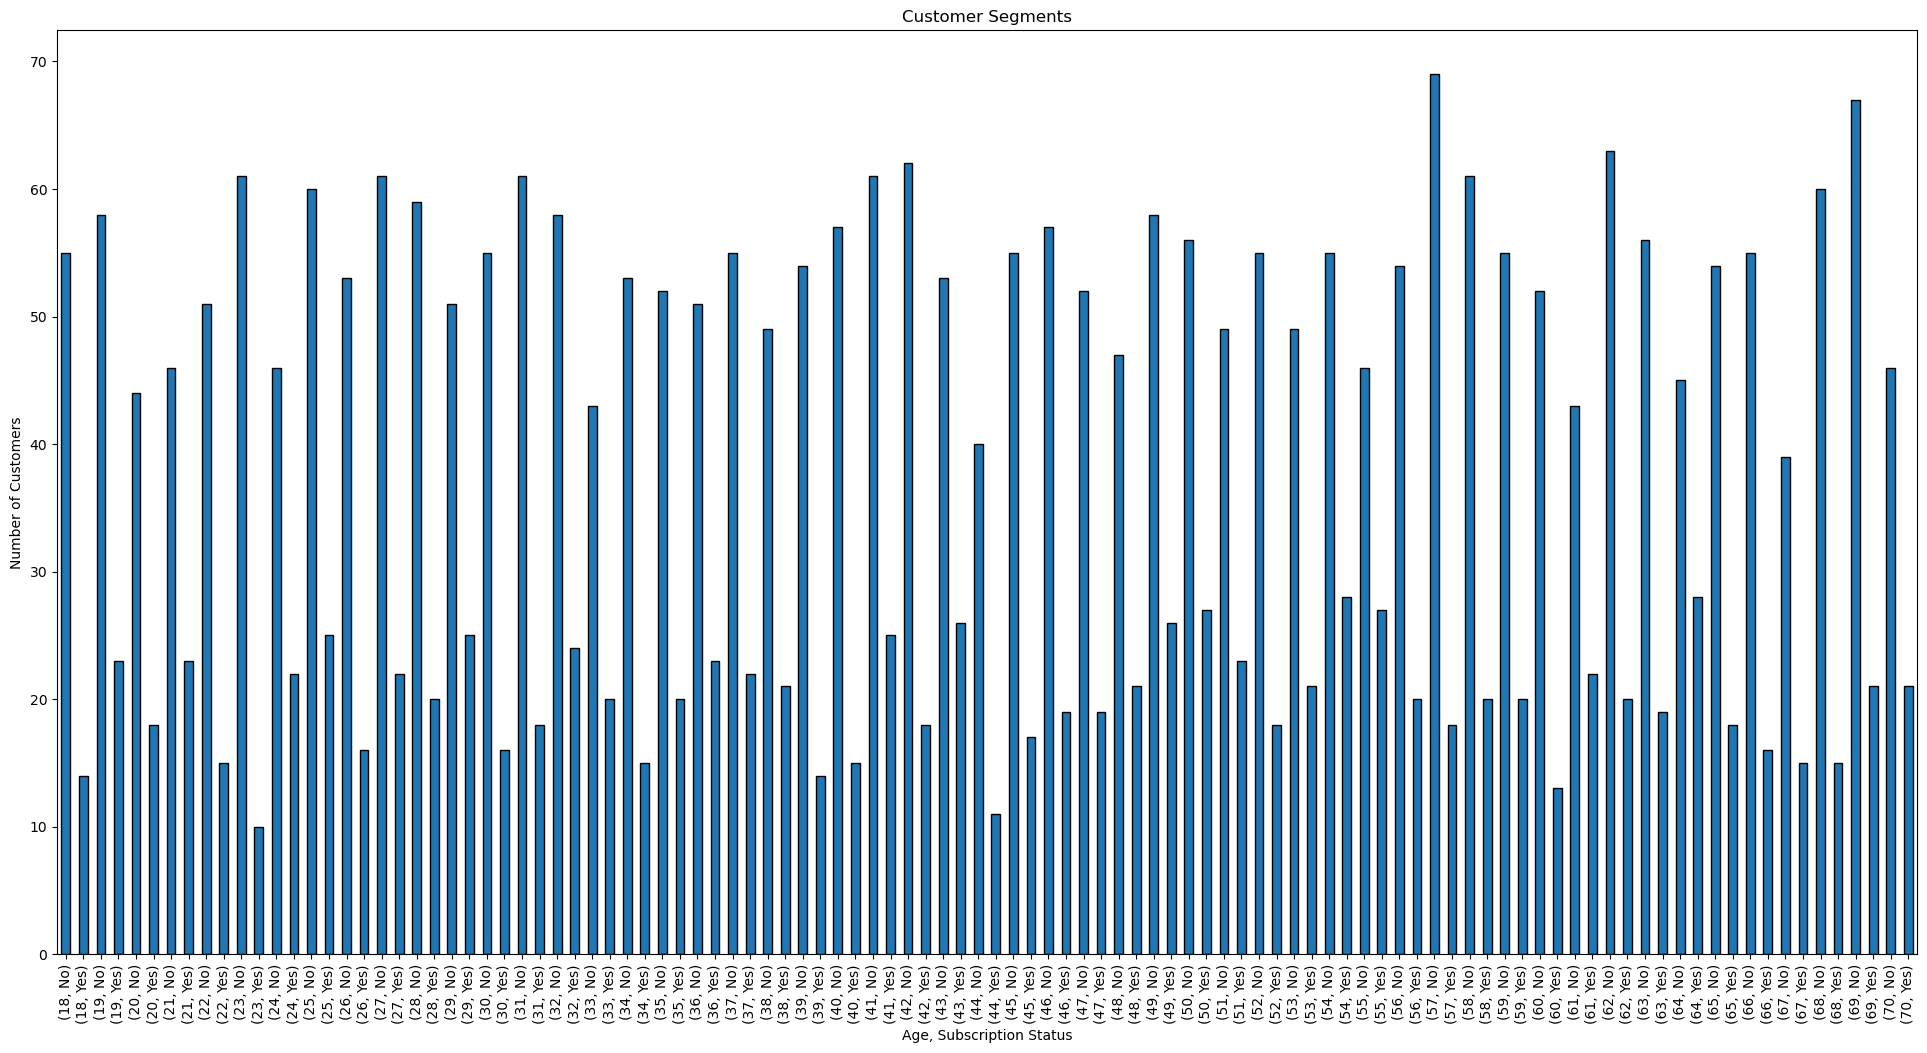

In [91]:
customer_segments = data.groupby(['Age', 'Subscription Status'])['Customer ID'].nunique()
print("Customer Segments:")
print(customer_segments)

#customer segments
plt.figure(figsize=(24,12))
customer_segments.plot(kind='bar', edgecolor='black')
plt.xlabel('Age, Subscription Status')
plt.ylabel('Number of Customers')
plt.title('Customer Segments')
plt.show()

As a Marketing Analyst:
I want to leverage machine learning techniques to predict the frequency of purchases for our customers based on their demographic and transactional data. This will enable me to identify segments of customers with different purchasing patterns, allowing our team to tailor marketing strategies and promotional activities to specific customer needs. Additionally, I aim to optimize our marketing efforts to retain high-frequency customers and strategically engage with those who may require targeted campaigns to increase their purchase frequency.

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

target_variable = 'Frequency of Purchases'
features = ['Age', 'Purchase Amount (USD)', 'Review Rating']


In [93]:
# Encode categorical variables
label_encoder = LabelEncoder()
data[target_variable] = label_encoder.fit_transform(data[target_variable])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data[features],
    data[target_variable],
    test_size=0.2,
    random_state=42
)

In [94]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

#train model
model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [95]:
#predictions
y_pred = model.predict(X_test)

In [96]:
#Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy {accuracy}
Confusion Matrix:
[[20 19 21 17 14 13 17]
 [11 20 15 11 12 13 14]
 [26 16 13 17 16 11 10]
 [20  9 23 13 12 12  9]
 [23 21 18 13 16 14 12]
 [17 17 13 24 19 19 20]
 [18 12 22  9 15 13 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.17      0.16       121
           1       0.18      0.21      0.19        96
           2       0.10      0.12      0.11       109
           3       0.12      0.13      0.13        98
           4       0.15      0.14      0.14       117
           5       0.20      0.15      0.17       129
           6       0.20      0.19      0.20       110

    accuracy                           0.16       780
   macro avg       0.16      0.16      0.16       780
weighted avg       0.16      0.16      0.16       780



In [97]:
#new data for predictions test
additional_new_data = pd.DataFrame({
    'Age': [30, 35, 40, 25],
    'Purchase Amount (USD)': [70, 60, 80, 50],
    'Review Rating': [4.2, 3.8, 4.5, 4.5]
})

# Making predictions on additional new data
additional_new_predictions = model.predict(additional_new_data)

# Displaying the predictions for additional test cases
for i in range(len(additional_new_predictions)):
    print(f"Predicted Frequency of Purchases for(Test Case {i + 1}): {additional_new_predictions[i]}")


Predicted Frequency of Purchases for(Test Case 1): 5
Predicted Frequency of Purchases for(Test Case 2): 6
Predicted Frequency of Purchases for(Test Case 3): 0
Predicted Frequency of Purchases for(Test Case 4): 0
